# Regression

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
import pandas as pd
boston = pd.read_csv(r"C:\Users\hp\OneDrive\Documents\Aiandyou\Webinar Contents\Linear Regression\Boston\boston.csv")
print(boston.head())

In [ ]:
boston.info()

In [ ]:
boston = boston.dropna()

In [ ]:
#Creating feature and target arrays
x = boston.drop("MEDV", axis=1)

y = boston["MEDV"]

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler


#split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Fit on training data, then transform
x_test_scaled = scaler.transform(x_test)        # Only transform test data




In [ ]:
model = LinearRegression()
model.fit(x_train_scaled, y_train) 

In [ ]:
y_pred = model.predict(x_test_scaled)

rmse = sqrt(Mean(acutal - predicted)**2)
margin of error in same unit

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

In [ ]:
import statsmodels.formula.api as smf
reg_all = smf.ols(formula = 'MEDV ~ CRIM + ZN + INDUS + CHAS + NX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=boston).fit()
reg_all.summary()

In [ ]:
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
# make a prediction
yhat = pipe.predict([row])
# summarize prediction
print('Predicted: %.3f' % yhat)

## **Cross-Validation**

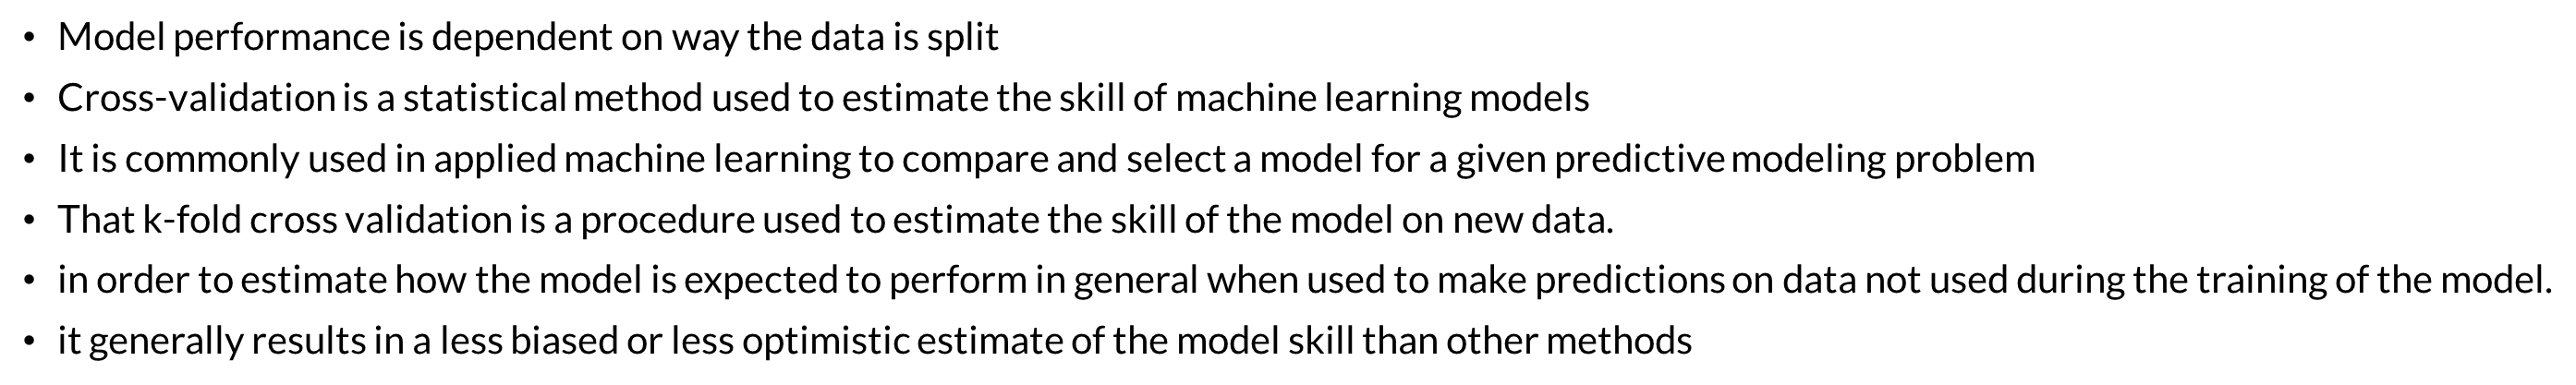

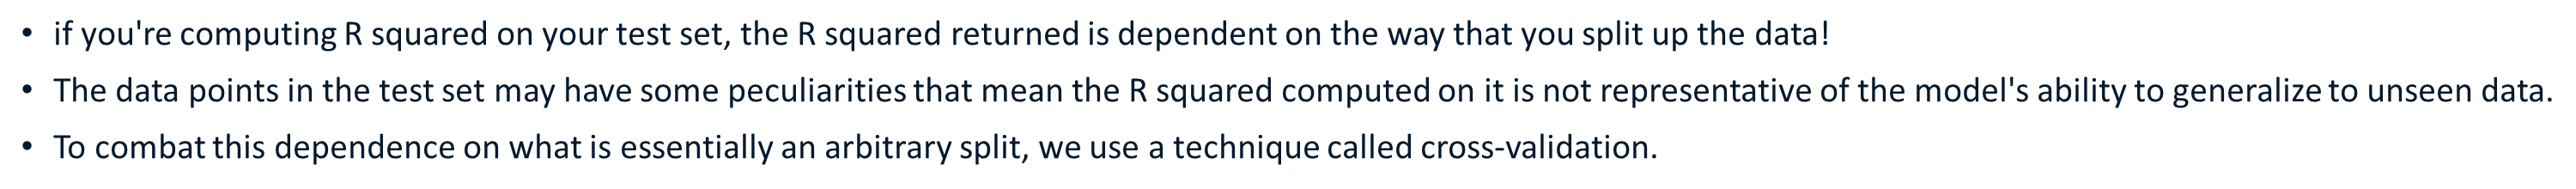

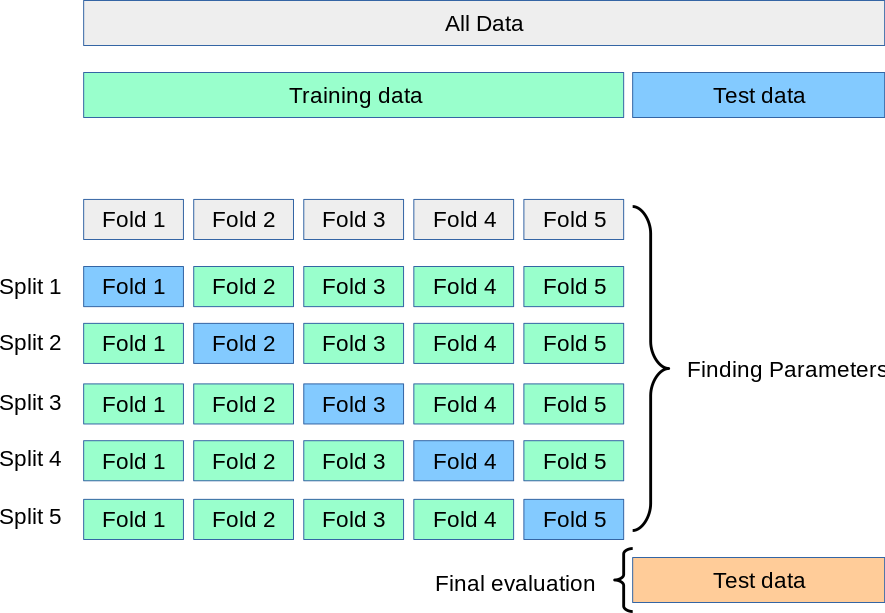

The choice of k is usually 5 or 10, but there is no formal rule.

As k gets larger, the difference in size between the training set and the resampling subsets gets smaller.

As this difference decreases, the bias of the technique becomes smaller 

To summarize, there is a bias-variance trade-off associated with the choice of k in k-fold cross-validation.

Typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10,

as these values have been shown empirically to yield test error rate estimates

that suffer neither from excessively high bias nor from very high variance.

**Commonly used variations are as follows:**

**Train/Test Split:** Taken to one extreme, k may be set to 2 (not 1) such that a single train/test split is created to evaluate the model.

**LOOCV:** Taken to another extreme, k may be set to the total number of observations in the dataset such that each observation is given a chance to be the held out of the dataset. This is called leave-one-out cross-validation, or LOOCV for short.

**Stratified:** The splitting of data into folds may be governed by criteria such as ensuring that each fold has the same proportion of observations with a given categorical value, such as the class outcome value. This is called stratified cross-validation.

**Repeated:** This is where the k-fold cross-validation procedure is repeated n times, where importantly, the data sample is shuffled prior to each repetition, which results in a different split of the sample.

**Nested:** This is where k-fold cross-validation is performed within each fold of cross-validation, often to perform hyperparameter tuning during model evaluation. This is called nested cross-validation or double cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_results = cross_val_score(pipe, x, y, cv=3)
print(cv_results)

In [ ]:
np.mean(cv_results)

take a look at Scikit-Learn's online [cross-validation documentation](http://scikit-learn.org/stable/modules/cross_validation.html).

# Ridge Regression

An extension to linear regression invokes adding penalties to the loss function during training that encourages simpler models that have smaller coefficient values.

These extensions are referred to as regularized linear regression or penalized linear regression.

Ridge Regression is a popular type of regularized linear regression that includes an L2 penalty.

This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task.

it is particularly useful to mitigate the problem of multicollinearity in linear regression, which commonly occurs in models with large numbers of parameters

The coefficients of the model are found via an optimization process that seeks to minimize the sum squared error between the predictions (yhat) and the expected target values (y)

# **Problem with Linear Regression**

A problem with linear regression is that estimated coefficients of the model can become large, making the model sensitive to inputs and possibly unstable.

This is particularly true for problems with few observations (samples) or less samples (n) than input predictors (p) or variables (so-called p >> n problems).

# **Effect of penalty**

The effect of this penalty is that the parameter estimates are only allowed to become large if there is a proportional reduction in SSE.

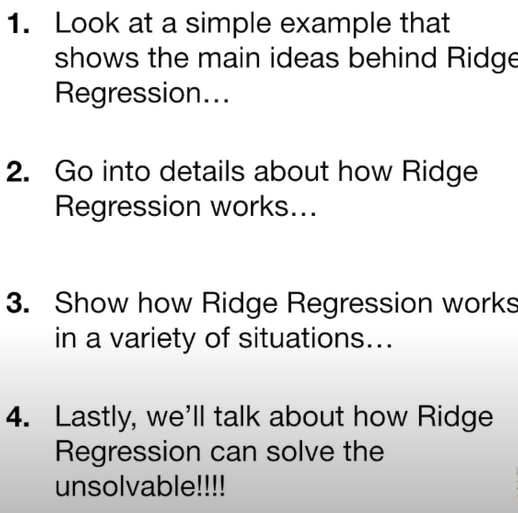

In [ ]:
from numpy import mean
from numpy import std
from numpy import absolute

from pandas import read_csv

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

import pandas as pd
boston = pd.read_csv("boston.csv")


#Creating feature and target arrays
x = boston.drop("MEDV", axis=1)

y = boston["MEDV"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# define model
model = Ridge(alpha=1)
#hyperparameter; an assumption #tuning of parameter

# fit model
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae = mean_absolute_error(y_test, y_pred)
mae

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

In [ ]:
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]

# make a prediction
yhat = model.predict([row])

# summarize prediction
print("Predicted Price: %.3f" % yhat)

## **Ridge with CV**

You need to note that Ridge regression function can't include cross validation within its function, so we need to apply ridge directly on x and y after testing the viability of ridge with certain lambda value, like we have done above by first testing the ridge with 10 cv and then apply on x and y.

In [ ]:
# use automatically configured the ridge regression algorithm
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

import pandas as pd
boston = pd.read_csv("boston.csv")


#Creating feature and target arrays
x = boston.drop("MEDV", axis=1)

y = boston["MEDV"]

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model
model.fit(x, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

In [ ]:
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
# define model
model = Ridge(alpha=0.51)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, x, y, scoring="neg_mean_absolute_error", cv=cv)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

**Ridge Resression with GridSearchCV**

In [ ]:
#grid search hyperparameters for ridge regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

import pandas as pd
boston = pd.read_csv("boston.csv")


#Creating feature and target arrays
x = boston.drop("MEDV", axis=1)

y = boston["MEDV"]

# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define parameters to be tuned #alpha: search range

parameters = {"alpha": arange(0, 1, 0.01)}

# define search
search = GridSearchCV(model, parameters, scoring="neg_mean_absolute_error", cv=cv)

# perform the search
results = search.fit(x, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
#grid search hyperparameters for ridge regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
import pandas as pd
boston = pd.read_csv("boston.csv")


#Creating feature and target arrays
x = boston.drop("MEDV", axis=1)

y = boston["MEDV"]

# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define parameters to be tuned #alpha: search range

parameters = {"alpha": arange(0, 1, 0.01)}

scorers = {'mean_squared_error': make_scorer(mean_squared_error), 'r2_score': make_scorer(r2_score)}

# define search
search = GridSearchCV(model, parameters, scoring=scorers,refit="mean_squared_error",cv=cv)
# Setting refit='mean_squared_error', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated mean_squared_error.

# perform the search
results = search.fit(x, y)

# summarize

print('Config: %s' % results.best_params_)

In [ ]:
print('MAE: %.3f' % results.best_score_)

# **Lasso** without CV

In [ ]:
# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

import pandas as pd
boston = pd.read_csv("boston.csv")


#Creating feature and target arrays
x = boston.drop("MEDV", axis=1)

y = boston["MEDV"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

# define model
model = Lasso(alpha=1)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae = mean_absolute_error(y_test, y_pred)
mae

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

**Tuning Lasso Hyperparameters**

How do we know that the default hyperparameter of alpha=1.0 is appropriate for our dataset?

We don’t.

Instead, it is good practice to test a suite of different configurations and discover what works best for our dataset.

Another approach would be to test values between 0.0 and 1.0 with a grid separation of 0.01. We will try the latter in this case.

The example below demonstrates this using the GridSearchCV class with a grid of values we have d

In [ ]:
# grid search hyperparameters for lasso regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
# load the dataset

# define model
model = Lasso()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define parameters to be tuned #alpha: search range

parameters = {"alpha": arange(0, 1, 0.01)}

# define search
search = GridSearchCV(model, parameters, scoring="neg_mean_absolute_error", cv=cv)

# perform the search
results = search.fit(x, y)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = results.predict(([row]))
print(yhat)

In [ ]:
# use automatically configured the lasso regression algorithm
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)
# fit model
model.fit(x, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

In [ ]:
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

In [ ]:
# define model
model = Lasso(alpha=1)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, x, y, scoring="neg_mean_absolute_error", cv=cv)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

### 📊 Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

### 📈 Actual vs Predicted Plot

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted Median Home Values')
plt.grid(True)
plt.show()

### 📌 Feature Importance (Model Coefficients)

In [ ]:
coefficients = pd.Series(model.coef_, index=x.columns)
coefficients.sort_values().plot(kind='barh', figsize=(10, 6), color='orange')
plt.title('Feature Coefficients in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()